In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact

import plotly.graph_objects as go
import pandas as pd



In [2]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    for i_1 in range(r**N):
        num_str=np.base_repr(i_1,base=r)[::-1]
        for i_2 in range(len(num_str)):
            states[i_1,i_2]=int(num_str[i_2])

    return states

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U


In [ ]:
Nrep=100
r=2 # local Hilbert space dim

La=4
Lb=4
L=16
Lc=L-La-Lb

Na=r**La
Nb=r**Lb
Nc=r**Lc

s_b = Hilbertspace_Zr(Lb,r)
s_a = Hilbertspace_Zr(La,r)
va = np.sum(s_a,axis=1)

# print(va)

s_c=Hilbertspace_Zr(Lc,r)
s_ab=Hilbertspace_Zr(La+Lb,r)

i_ab=np.zeros((r**(La+Lb-1),r),dtype=int)
i_c=np.zeros((r**(Lc-1),r),dtype=int)
### indices of r multiples
for i_r in range(r):
    i_c[:,i_r]=np.argwhere(np.mod(np.sum(s_c,axis=1),r)==i_r)[:,0]
    i_ab[:,i_r]=np.argwhere(np.mod(np.sum(s_ab,axis=1),r)==i_r)[:,0]

#### uncomment if you want to set the rand num generator seed ####
# # % rng(sum(100*clock()));
# # % rng(11)
Ne_ab=r**(La+Lb-1)
Ne_c=r**(Lc-1)
X=np.zeros((Na*Nb,Nc), dtype=np.complex128)

# v1=zeros(Nrep*Nb*Na,1);

neg=np.zeros(Nrep)
v1b=np.zeros(Nrep*Nb*Na)
v1=np.zeros(Nrep*Nb*Na)
negb=np.zeros(Nrep)

for i_r in range(Nrep):
    i_r
    #### no symmetry
#     X=np.random.randn(Na*Nb,Nc)+1j*np.random.randn(Na*Nb,Nc)

    X[np.ix_(i_ab[:,0],i_c[:,0])]=np.random.randn(Ne_ab,Ne_c)+ 1j*np.random.randn(Ne_ab,Ne_c)
#     X[i_ab[:,0],:] = np.random.randn(Ne_ab,Nc)+ 1j*np.random.randn(Ne_ab,Nc)
    #### imposing Z_3 symmetry
#     for i_Zr in np.arange(1,r):
#         X[i_ab[:,i_Zr],i_c[:,r-i_Zr]]=np.random.randn(Ne_ab,Ne_c)+1j*np.random.randn(Ne_ab,Ne_c)

    mat=np.dot(X,np.matrix(X).H)
    rho= mat / np.trace(mat)
    l1=np.linalg.eigvalsh(rho)
    v1[i_r*Nb*Na:(i_r+1)*Nb*Na] = (Na*Nb)*l1
    
    rT2b = p_transpose_2(rho,Na,Nb)
    l1T=np.linalg.eigvalsh(rT2b)
    v1b[i_r*Nb*Na:(i_r+1)*Nb*Na] = (Na*Nb)*l1T
    negb[i_r]=np.sum(np.abs(l1T))


In [ ]:
num_bins = 100
n, bins, patches = plt.hist(v1b, num_bins, facecolor='blue', alpha=0.5)
plt.show()

# n, bin_edges = np.histogram(v1b, bins=num_bins)
# bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])

# # n, bins, patches = plt.hist(v1, num_bins, facecolor='red', alpha=0.5)
# # plt.ylim(0,2000)
# # plt.show()
# plt.figure()
# plt.plot(bins_center,n,'o-',markersize=2)
# plt.show()
# print(n.shape,bins.shape)

In [39]:
Nrep=1000
r=2 # local Hilbert space dim

La=3
Lb=3
L=8
Lc=L-La-Lb

Na=r**La
Nb=r**Lb
Nc=r**Lc

s_b = Hilbertspace_Zr(Lb,r)
s_a = Hilbertspace_Zr(La,r)
va = np.sum(s_a,axis=1)

# print(va)

s_c=Hilbertspace_Zr(Lc,r)
s_ab=Hilbertspace_Zr(La+Lb,r)

i_ab=np.zeros((r**(La+Lb-1),r),dtype=int)
i_c=np.zeros((r**(Lc-1),r),dtype=int)
### indices of r multiples
for i_r in range(r):
    i_c[:,i_r]=np.argwhere(np.mod(np.sum(s_c,axis=1),r)==i_r)[:,0]
    i_ab[:,i_r]=np.argwhere(np.mod(np.sum(s_ab,axis=1),r)==i_r)[:,0]

#### uncomment if you want to set the rand num generator seed ####
# # % rng(sum(100*clock()));
# # % rng(11)
Ne_ab=r**(La+Lb-1)
Nab_r=int(Nb*Na/r)
Ne_c=r**(Lc-1)
X=np.zeros((Na*Nb,Nc), dtype=np.complex128)

# v1=zeros(Nrep*Nb*Na,1);

vT=np.zeros(Nrep*Nb*Na)
vT0=np.zeros(Nrep*Nab_r)
vT1=np.zeros(Nrep*Nab_r)
negb=np.zeros(Nrep)

for i_r in range(Nrep):
    i_r
    #### no symmetry
#     X=np.random.randn(Na*Nb,Nc)+1j*np.random.randn(Na*Nb,Nc)

    X[np.ix_(i_ab[:,0],i_c[:,0])]=np.random.randn(Ne_ab,Ne_c)+ 1j*np.random.randn(Ne_ab,Ne_c)

    mat=np.dot(X,np.matrix(X).H)
    rho= mat / np.trace(mat)    
    rT = p_transpose_2(rho,Na,Nb)
    lT=np.linalg.eigvalsh(rT)
    negb[i_r]=np.sum(np.abs(lT))
    
    vT[i_r*Nb*Na:(i_r+1)*Nb*Na] = (Na*Nb)*lT
    
    rT0= rT[np.ix_(i_ab[:,0],i_ab[:,0])]
    lT0=np.linalg.eigvalsh(rT0)
    vT0[i_r*Nab_r:(i_r+1)*Nab_r] = (Na*Nb)*lT0

    rT1= rT[np.ix_(i_ab[:,1],i_ab[:,1])]
    lT1=np.linalg.eigvalsh(rT1)
    vT1[i_r*Nab_r:(i_r+1)*Nab_r] = (Na*Nb)*lT1
      

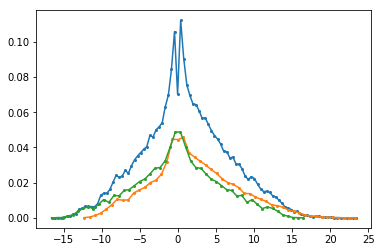

In [40]:
num_bins = 100
# n, bins, patches = plt.hist(v1b, num_bins, facecolor='blue', alpha=0.5)
# plt.show()

n, bin_edges = np.histogram(vT, bins=num_bins)
bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])

num_bins1=50
n0, bin_edges0 = np.histogram(vT0, bins=num_bins1)
bins_center0= (bin_edges0[0:num_bins1]+ bin_edges0[1:])/2
n0= n0/np.sum(n0)/(bin_edges0[1]-bin_edges0[0])

n1, bin_edges1 = np.histogram(vT1, bins=num_bins1)
bins_center1= (bin_edges1[0:num_bins1]+ bin_edges1[1:])/2
n1= n1/np.sum(n1)/(bin_edges1[1]-bin_edges1[0])

# vc=np.concatenate((vT0,vT1))
# nc, bin_edgesc = np.histogram(vc, bins=num_bins)
# bins_centerc= (bin_edgesc[0:num_bins]+ bin_edgesc[1:])/2
# nc= nc/np.sum(nc)/(bin_edgesc[1]-bin_edgesc[0])


plt.figure()
plt.plot(bins_center,n,'o-',markersize=2)
plt.plot(bins_center0,n0/2,'o-',markersize=2)
plt.plot(bins_center1,n1/2,'o-',markersize=2)
plt.show()
